In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
pathTr= "My Drive/images/dataset/train.csv"
pathTe = "My Drive/images/dataset/test.csv"

train = pd.read_csv(pathTr)
test = pd.read_csv(pathTe)


In [ ]:
train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [ ]:
test.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [ ]:
import os
imgPath = "My Drive/images/dataset/train"
cfiles = [f for f in os.listdir(imgPath) if os.path.isfile(os.path.join(imgPath,f))]

In [ ]:
imgPath = "My Drive/images/dataset/test"
testFiles = [f for f in os.listdir(imgPath) if os.path.isfile(os.path.join(imgPath,f))]

In [ ]:
import cv2

In [ ]:
playNames = train["target"].values
y = []
trainImages = []

arr = train["Image"].values
for i in cfiles:
  if i in arr:
    ind = np.where(arr==i)[0][0]
    path = "My Drive/images/dataset/train/" + i
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (300,300), interpolation=cv2.INTER_CUBIC)
    trainImages.append(img)
    y.append(playNames[ind])

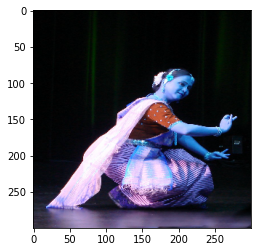

In [ ]:
plt.imshow(trainImages[0])

In [ ]:
testImages = []
imgPath = "My Drive/images/dataset/test"
for link in testFiles:
  path = "My Drive/images/dataset/test/" + link
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (300,300), interpolation=cv2.INTER_CUBIC)
  testImages.append(img)

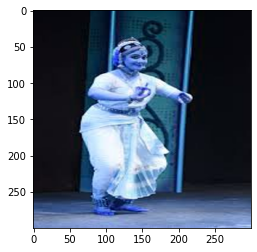

In [ ]:
plt.imshow(testImages[40])

In [ ]:
trainImg = np.ndarray([len(trainImages),300,300,3])
testImg = np.ndarray([len(testImages),300,300,3])

In [ ]:
def getImages(data,arr):
  i = 0
  for img in data:
    arr[i] = img
    i+=1
  return arr

In [ ]:
trainImg = getImages(trainImages,trainImg)
trainImg.shape

(364, 300, 300, 3)

In [ ]:
trainImg[300].shape

(300, 300, 3)

In [ ]:
testImg = getImages(testImages,testImg)
testImg.shape

(162, 300, 300, 3)

In [ ]:
testImg[16].shape

(300, 300, 3)

In [ ]:
act = ['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak','sattriya', 'kuchipudi', 'mohiniyattam']
actual = []

for val in y:
  ind = act.index(val)
  actual.append(ind+1)



In [ ]:
y[159]

'mohiniyattam'

In [ ]:
actual[159]

8

trainImg
testImg
y 

In [ ]:
!pip install tensorflow==1.4

     |████████████████████████████████| 41.2MB 91kB/s 
     |████████████████████████████████| 1.7MB 41.3MB/s 
     |████████████████████████████████| 890kB 35.2MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=f9f409dc56171c92cc8915e37012255fc687c6382c8c649eb3276f0dc29587f3
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [ ]:
tf.__version__

'1.4.0'

In [ ]:
length=300
width=300
height=3
n_inputs=300*300*3
n_channels=1
n_outputs=8

conv1_maps=256
conv1_ksize = 4
conv1_strides=1
conv1_padd= "VALID"

conv2_maps=128
conv2_ksize = 4
conv2_strides=1
conv2_padd= "VALID"

conv3_maps=64
conv3_ksize = 3
conv3_strides=1
conv3_padd= "VALID"

conv4_maps=64
conv4_ksize = 3
conv4_strides=1
conv4_padd= "VALID"

conv5_maps=32
conv5_ksize = 3
conv5_strides=1
conv5_padd= "VALID"

conv6_maps=32
conv6_ksize = 3
conv6_strides=1
conv6_padd= "VALID"

conv7_maps=16
conv7_ksize = 3
conv7_strides=1
conv7_padd= "VALID"

conv8_maps=8
conv8_ksize = 3
conv8_strides=1
conv8_padd= "VALID"


n_f1 = 32
n_f2 = 16
n_outputs=9
learning_rate=0.5
#reset_graph()

with tf.name_scope("inputs"):
    X1= tf.placeholder(tf.float32,shape=[None,300,300,3],name="X_")
    y1 = tf.placeholder(tf.int32,shape=[None],name="y_")

    conv1 = tf.layers.conv2d(X1,filters=conv1_maps,kernel_size=conv1_ksize,padding=conv1_padd,activation=tf.nn.relu,
                        strides=conv1_strides)
    conv1_b = tf.layers.batch_normalization(conv1)

    print(conv1_b.shape)
    conv2 = tf.layers.conv2d(conv1_b,filters=conv2_maps,kernel_size=conv2_ksize,padding=conv2_padd,activation=tf.nn.relu,
                        strides=conv2_strides)
    conv2_b = tf.layers.batch_normalization(conv2)

    print(conv2_b.shape)
    pool1 = tf.nn.max_pool(conv2_b,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    #flat1 = tf.contrib.layers.flatten(pool1)
    flat_a = tf.layers.batch_normalization(pool1)
    
    print(pool1.shape)

    conv3 = tf.layers.conv2d(flat_a,filters=conv3_maps,kernel_size=conv3_ksize,padding=conv3_padd,activation=tf.nn.relu,
                        strides=conv3_strides)
    conv3_b = tf.layers.batch_normalization(conv3)

    print(conv3_b.shape)
    conv4 = tf.layers.conv2d(conv3_b,filters=conv4_maps,kernel_size=conv4_ksize,padding=conv4_padd,activation=tf.nn.relu,
                        strides=conv4_strides)
    conv4_b = tf.layers.batch_normalization(conv4)

    print(conv4_b.shape)
    pool2 = tf.nn.max_pool(conv4_b,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    #flat2 = tf.contrib.layers.flatten(pool2)
    flat_b = tf.layers.batch_normalization(pool2)

    print(flat_b.shape)
    conv5 = tf.layers.conv2d(flat_b,filters=conv5_maps,kernel_size=conv5_ksize,padding=conv5_padd,activation=tf.nn.relu,
                        strides=conv5_strides)
    conv5_b = tf.layers.batch_normalization(conv5)

    print(conv5_b.shape)
    conv6 = tf.layers.conv2d(conv5_b,filters=conv6_maps,kernel_size=conv6_ksize,padding=conv6_padd,activation=tf.nn.relu,
                        strides=conv6_strides)
    conv6_b = tf.layers.batch_normalization(conv6)

    print(conv6_b.shape)
    pool3 = tf.nn.max_pool(conv6_b,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    #flat3 = tf.contrib.layers.flatten(pool3)
    flat_c = tf.layers.batch_normalization(pool3)

    print(flat_c.shape)
    conv7 = tf.layers.conv2d(flat_c,filters=conv7_maps,kernel_size=conv7_ksize,padding=conv7_padd,activation=tf.nn.relu,
                        strides=conv7_strides)
    conv7_b = tf.layers.batch_normalization(conv7)

    print(conv7_b.shape)
    conv8 = tf.layers.conv2d(conv7_b,filters=conv8_maps,kernel_size=conv8_ksize,padding=conv8_padd,activation=tf.nn.relu,
                        strides=conv8_strides)
    conv8_b = tf.layers.batch_normalization(conv8)

    print(conv8_b.shape)

    pool4 = tf.nn.max_pool(conv8_b,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    flat4 = tf.contrib.layers.flatten(pool4)
    flat_d = tf.layers.batch_normalization(flat4)
  
print(flat_d.shape)

with tf.name_scope("full"):
    full1 = tf.layers.dense(flat_d,n_f1,activation=tf.nn.relu)
    full2 = tf.layers.dense(full1,n_f2,activation= tf.nn.relu)

with tf.name_scope("out"):
    logits=tf.layers.dense(full2,n_outputs)
    
print(logits.shape)
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y1)
    loss = tf.reduce_mean(xentropy)
    optimize = tf.train.AdamOptimizer()
    training_ob = optimize.minimize(loss)
    #print(training_ob)
    
with tf.name_scope("eval"):
    score = tf.nn.in_top_k(logits,y1,1)
    accuracy = tf.reduce_mean(tf.cast(score,tf.float32))
    cls_pred = tf.argmax(logits,axis=1,name="Predictions")

with tf.name_scope("init"):
    init = tf.global_variables_initializer()


(?, 297, 297, 256)
(?, 294, 294, 128)
(?, 147, 147, 128)
(?, 145, 145, 64)
(?, 143, 143, 64)
(?, 72, 72, 64)
(?, 70, 70, 32)
(?, 68, 68, 32)
(?, 34, 34, 32)
(?, 32, 32, 16)
(?, 30, 30, 8)
(?, 1800)
(?, 9)


In [ ]:
def next_batch(batch_size,data,labels):
    index = np.arange(0,len(data))
    np.random.shuffle(index)
    indec = index[:batch_size]
    data_shuffle = [data[i] for i in indec]
    label_shuffle = [labels[i] for i in indec]
    return np.asarray(data_shuffle),np.asarray(label_shuffle)

In [ ]:
def next_batch_test(batch_size,data):
    index = np.arange(0,len(data))
    np.random.shuffle(index)
    indec = index[:batch_size]
    data_shuffle = [data[i] for i in indec]
    return np.asarray(data_shuffle)

In [ ]:
#trainImg testImg y
epochs = 1
batch_size= 10
with tf.Session() as sess:
    init.run()
    for epoch in range(epochs):
        for batch_i in range(1):
            X_branch,y_branch = next_batch(batch_size,trainImages,actual)
            print(X_branch.shape,y_branch.shape)
            X_branch = X_branch.reshape(batch_size,300,300,3)
            sess.run(training_ob,feed_dict={X1:X_branch,y1:y_branch})
            #print(logits)
        acc1 = accuracy.eval(feed_dict={X1:X_branch,y1:y_branch})
        X_test = next_batch_test(batch_size,testImages)
        X_test = X_test.reshape(batch_size,300,300,3)
        cls_prediction = sess.run(cls_pred, feed_dict={X1: X_test})
        print(cls_prediction)
        #acc2 = accuracy.eval(feed_dict={X:X_test,y:y_test})
        print(acc1)

(10, 300, 300, 3) (10,)
[0 0 0 0 0 0 0 6 0 0]
0.2


manipuri


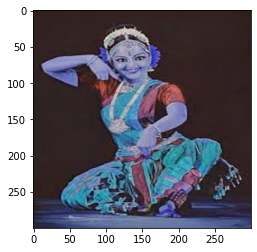

In [ ]:
plt.imshow(X_test[0].reshape(300,300,3))
print(y[1])

In [ ]:
8